In [59]:
import importlib
import main,input,reservoir,output
importlib.reload(main)
importlib.reload(input)
importlib.reload(reservoir)
importlib.reload(output)
import numpy as np
import random
random.seed(1024)
np.random.seed(1024)


d_r=2000 #dimension of reservoir
tp=2/3 #training portion of lorenz data, always<1. e.g. tp=2/3 means first 2/3 of the generated dynamic system data used for training
lr=.0005 #learning rate for training
#adjust more params of the original dynamic system generated in input.lorenz() of input.py or in any call site of this func.
#most other params are using hyperparam from Hybrid Forecasting of Chaotic Processing paper (2018), Pathak et al..
i,r,o,train,pred,lor=main.main(d_r,tp,lr)

#graph plots x,y,z coordinates from both the generated dynamic system and the RP output against time.
#at ~1000 iterations the input is cut off and obviously the RP model itself blows up from then
#this is not even reproducible as with some random inits this thing blows really up by some extreme hundred-fold

2000 3


KeyboardInterrupt: 

In [ ]:
import torch
import numpy
print(o.out(torch.FloatTensor(numpy.zeros(d_r))))
print(train[-3],train[-2],train[-1],pred[0],pred[1])

tensor([-1.7005e+17, -1.8436e+17, -2.3563e+17], grad_fn=<AddBackward0>)
[2.0866827e+20 2.2622107e+20 2.8914397e+20] [-3.8866575e+20 -4.2135956e+20 -5.3855976e+20] [7.41599517e+20 8.03981480e+20 1.02760695e+21] [-inf -inf -inf] [nan nan nan]


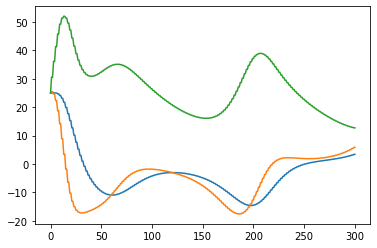

In [ ]:

import matplotlib.pyplot as plt
plt.plot(lor)
